In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['Covid-19','Non-Covid-19']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/MyDrive/image data'
#path which contains all the categories of images
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data
y=df.iloc[:,-1] #output data

loading... category : Covid-19
loaded category:Covid-19 successfully
loading... category : Non-Covid-19
loaded category:Non-Covid-19 successfully


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1]
The actual data is:
[0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1]
The model is 70.0% accurate


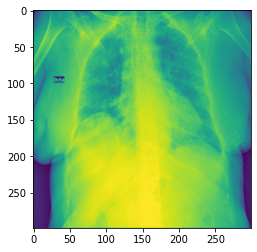

Covid-19 = 99.7926188094727%
Non-Covid-19 = 0.20738119052728793%
The predicted image is : Covid-19


In [ ]:
img= imread('/content/drive/MyDrive/image data/Covid-19/COVID-49.png')
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

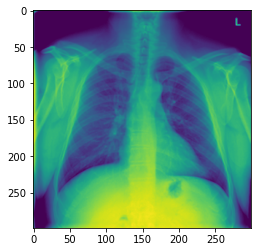

Covid-19 = 14.72099296061446%
Non-Covid-19 = 85.27900703938555%
The predicted image is : Non-Covid-19


In [ ]:
img= imread('/content/drive/MyDrive/image data/Non-Covid-19/Normal-39.png')
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

In [ ]:
svm = svm.SVC(kernel='poly', C=2.25).fit(x_train, y_train)
svm_predictions = svm.predict(x_test)
print(accuracy_score(y_true=y_test,y_pred=svm_predictions))

0.7
